# Data Analysis Homework 1

In [2]:
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.special import erf
from scipy.special import erfc
from math import factorial as factorial
from random import seed
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Mean, Standard Deviation and Standard Error

12 measurements of the sensitivity of a photo diode circuit (in Amps/Watt) are: 
<bf>
11.45, 10.91, 11.60, 10.59, 10.32, 10.34, 11.00, 10.94, 11.67, 11.67, 11.06, and 10.57. 
<bf>
Calculate:
<blockquote>
<bf>
(i) The Mean.
<bf>
(ii) The Standard Deviation.
<bf>
(iii) The Standard Error.
<bf>
(iv) How would you report the result?

In [3]:
data = [11.45, 10.91, 11.60, 10.59, 10.32, 10.34, 11.00, 10.94, 11.67, 11.67, 11.06, 10.57]

### (i) Calculate the Mean

In [4]:
def one_i(data):
    count = 0
    for i in data:
        count += i
    return count / len(data)
print(one_i(data))

11.01


In [5]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert one_i(data) <= np.max(data)
assert one_i(data) >= np.min(data)

### (ii) Calculate the sample Standard Deviation.

In [13]:
def one_ii(data):
    mean = one_i(data)
    count = 0
    for i in data:
        count += (i - mean) ** 2
    count /= (len(data))
    count = count ** (1/2)
    return count

In [14]:
print(one_ii(data))

0.4765675887706449


In [15]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert one_ii(data) >= 0

### (iii) Calculate the Standard Error.

In [16]:
def one_iii(data):
    return one_ii(data) / (len(data) ** (1/2))

In [17]:
print(one_iii(data))

0.13757321283189136


In [18]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert one_ii(data) >= 0

### (iv) How would you report the result?

In [19]:
11.1 +- 0.1 Amps/Watts

10.6

## Question 2: Error in the error

Consider a set of measurements with the standard error calculated to be $\alpha=0.987654321$.  Here we address the question of how many significant figures should be quoted.  

Required:
<blockquote>

(i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 
<bf>
(ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data
<bf>
(iii) Repeat the analysis for the case where α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.
<bf>
(iv) How many data points must be collected before the third significant figure can be quoted?

### (i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 

In [20]:
csv = []
value = [2, 3, 5, 10, 20, 30, 100]
a = 0.987654321
for i in value:
    listTmp = []
    listTmp.append(i)
    listTmp.append(a)
    listTmp.append(a * (1 - (1 / (2 * i - 2) ** 0.5)))
    listTmp.append(a * (1 + (1 / (2 * i - 2) ** 0.5)))
    csv.append(listTmp)

pd.DataFrame(csv)

,0,1,2,3
0,2,0.987654,0.289277,1.686031
1,3,0.987654,0.493827,1.481481
2,5,0.987654,0.638466,1.336843
3,10,0.987654,0.754862,1.220447
4,20,0.987654,0.827436,1.147873
5,30,0.987654,0.857969,1.117340
6,100,0.987654,0.917465,1.057844


### (ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data

In [21]:
csv = []
value = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
a = 0.987654321
for i in value:
    listTmp = []
    listTmp.append(i)
    listTmp.append(a)
    listTmp.append(a * (1 - (1 / (2 * i - 2) ** 0.5)))
    listTmp.append(a * (1 + (1 / (2 * i - 2) ** 0.5)))
    csv.append(listTmp)

pd.DataFrame(csv)

,0,1,2,3
0,10,0.987654,0.754862,1.220447
1,100,0.987654,0.917465,1.057844
2,1000,0.987654,0.965559,1.009750
3,10000,0.987654,0.980670,0.994638
4,100000,0.987654,0.985446,0.989863
5,1000000,0.987654,0.986956,0.988353
6,10000000,0.987654,0.987433,0.987875


We need 10 thousand to approach the second significant figure

### (iii) Repeat the analysis for the case where  α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.

In [22]:
csv = []
value = [10, 100, 1000, 10000, 100000]
a = 0.123456789
for i in value:
    listTmp = []
    listTmp.append(i)
    listTmp.append(a)
    listTmp.append(a * (1 - (1 / (2 * i - 2) ** 0.5)))
    listTmp.append(a * (1 + (1 / (2 * i - 2) ** 0.5)))
    csv.append(listTmp)

pd.DataFrame(csv)

,0,1,2,3
0,10,0.123457,0.094358,0.152556
1,100,0.123457,0.114683,0.132230
2,1000,0.123457,0.120695,0.126219
3,10000,0.123457,0.122584,0.124330
4,100000,0.123457,0.123181,0.123733


We need 100 data to approach the first significant digit

### (iv) How many data points must be collected before the third significant figure can be quoted?

For the a=0.987654321, we need 10 million to approach the third significant digit.
For the a=0.123456789, we need 100 thousand to approach the third significant digit.

## Question 3: Confidence limits for a Gaussian Distribution

|Centred on Mean | Measurements within range | Measurements outside range |
| --- | --- | --- |
| $\pm\sigma$ | 68% | 32% |
| $\pm1.65\sigma$ | 90% | 10% |
| $\pm2\sigma$ | 95% | 5% |
| $\pm2.58\sigma$ | 99% | 1% |
| $\pm3\sigma$ | 99.7% | 0.3% |

(i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. 
<bf>
(ii) What fraction of the data lies outside the following ranges from the mean? 
<blockquote>
<bf>
(a) $\pm4\sigma$ 
<bf>
(b) $\pm5\sigma$.  
</blockquote>

(iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$? 
<blockquote>
<bf>
(a) 50% 
<bf>
(b) 99.9%.

### (i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. You must return your answers as an ARRAY OF PERCENTAGES.

In [84]:
def three_i():
    '''Return the measurements in range as an array. '''
    u = 2
    a = 0.1
    value = [1, 1.65, 2, 2.58, 3]
    distribution = np.random.normal(u, a, 10000)
    measurements_in_range = []
    for i in value:
        count = 0
        for num in distribution:
            if (u - a * i) < num < (u + a * i):
                count += 1
        count /= len(distribution)
        measurements_in_range.append(count)
    
    # YOUR CODE HERE
    return(measurements_in_range)

print(three_i())

[0.6766, 0.8982, 0.9529, 0.9906, 0.9969]


In [73]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
assert type(three_i()) == list or type(three_i()) ==np.ndarray

### (ii) What fraction of the data lies outside the following ranges from the mean? You must return your answer as a PERCENTAGE.
<blockquote>
<bf>
(a) $\pm4\sigma$ 
    
<bf>
(b) $\pm5\sigma$.  
</blockquote>


In [78]:
def three_iia():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    value = 4
    u = 2
    a = 0.1
    distribution = np.random.normal(u, a, 1000000)
    count = 0
    for num in distribution:
        if (u - a * value) < num < (u + a * value):
            count += 1
    count /= len(distribution)
    measurements_in_range = count
    return measurements_in_range

def three_iib():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    value = 5
    u = 2
    a = 0.1
    distribution = np.random.normal(u, a, 1000000)
    count = 0
    for num in distribution:
        if (u - a * value) < num < (u + a * value):
            count += 1
    count /= len(distribution)
    measurements_in_range = count
    return measurements_in_range
    
print("%f%%" % (three_iia() * 100))
print("%f%%" % (three_iib() * 100))

99.993100%
99.999900%


In [41]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iia() >= 0.0
assert three_iia() <= 1.0

In [27]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iib() >= 0.0
assert three_iib() <= 1.0

### (iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$?
<blockquote>
<bf>
(a) 50% 
<bf>
(b) 99.9%.

In [28]:
def three_iiia():
    u = 2
    a = 0.1
    distribution = np.random.normal(u, a, 10000)
    a_new_50 = np.percentile(distribution, 25)
    answer_50 = (u - a_new_50) / a
    return answer_50

def three_iiib():
    '''Return the multiple of sigma'''
    u = 2
    a = 0.1
    distribution = np.random.normal(u, a, 1000000)
    a_new_999 = np.percentile(distribution, 0.005)
    answer_999 = (u - a_new_999) / a
    return answer_999

print(three_iiia())
print(three_iiib())

0.6528022319580629
3.9531174657100365
0.9888525509296557


In [29]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iiia() >= 0.0

In [30]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
assert three_iiib() >= 0.0

## Question 4: Identifying a Potential Outlier

Seven successive measurements of the charge stored on a capacitor (all in $\mu C$) are: 
<bf>
45.7, 53.2, 48.4, 45.1, 51.4, 62.1 and 49.3. 
<bf>
The sixth reading appears anomalously large. 

Required:
<blockquote>
(i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 
</blockquote>
<blockquote>
(ii) Having decided whether to keep 6 or 7 data points, calculate:
<bf>
<blockquote>
(a) The Mean
</blockquote>
<bf>
<blockquote>
(b) Standard Deviation
</blockquote>
<bf>
<blockquote>
(c) Error of the Charge.

### (i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 

In [86]:
data_points = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]

def four_i():
    '''Your function must return the probability of an outlier, n_out and your comment to ACCEPT or REJECT'''
    probability_outlier = 0
    n_out = 0
    comment = ''
    # YOUR CODE HERE
    mean_origin = one_i(data_points)
    standard_deviation_origin = one_ii(data_points)
    standard_error_origin = one_iii(data_points)
    
    value = []
    for i in range(len(data_points)):
        value.append(abs(data_points[i] - mean_origin) / standard_deviation_origin)
        
    distribution = np.random.normal(mean_origin, standard_deviation_origin, 100000)
    measurements_in_range = []
    for i in value:
        count = 0
        for num in distribution:
            if (mean_origin - standard_deviation_origin * i) < num < (mean_origin + standard_deviation_origin * i):
                count += 1
        count /= len(distribution)
        measurements_in_range.append(count)
    
    # calculate the most highest probability of all elemengt being the outlier 
    p_0 = 1
    for p in range(len(measurements_in_range)):
        if p_0 > 1 - measurements_in_range[p]:
            p_0 = 1 - measurements_in_range[p]
            outlier_index = p
            
    n_out = p_0 * len(data_points)
    probability_outlier = p_0
    
    # calculate the probability of every element being the outlier 
    all_probability_outlier = []
    for p in measurements_in_range:
        all_probability_outlier.append((1 - p) * len(data_points))
    
    if n_out < 0.5:
        comment = "REJECT"
    else:
        comment = "ACCEPT"
    
    return(probability_outlier,n_out,comment)

In [87]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
test = four_i()
assert type(test[0]) == float
assert type(test[1]) == float
assert type(test[2]) == str

### (iia) Having decided whether to keep 6 or 7 datapoints, calculate the mean.

In [36]:
def four_iia():
    new_data_points = []
    data_points = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]
    for i in range(len(data_points)):
        if (i != 5):
            new_data_points.append(data_points[i])
    return one_i(new_data_points)
    # YOUR CODE HERE

In [37]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iia() > 0.0

48.85


### (iib) Having decided whether to keep 6 or 7 datapoints, calculate the standard deviation.

In [ ]:
def four_iib():
    new_data_points = []
    data_points = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]
    for i in range(len(data_points)):
        if (i != 5):
            new_data_points.append(data_points[i])
    return one_ii(new_data_points)
    # YOUR CODE HERE

In [ ]:
'''TEST CELL- DO NOT DELETE'''
assert four_iib() > 0.0

### (iic) Having decided whether to keep 6 or 7 datapoints, calculate the standard error.

In [38]:
def four_iic():
    '''Your function should return the standard error'''
    new_data_points = []
    data_points = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]
    for i in range(len(data_points)):
        if (i != 5):
            new_data_points.append(data_points[i])
    return one_iii(new_data_points)

In [39]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iic() > 0.0

## Question 5: Poisson and Gaussian

Required:
<bf>
<blockquote>
(i) Plot a histogram of a Poisson distribution with mean 35.  
<bf>
</blockquote>
<blockquote>
(ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$.  
</blockquote>
<bf>
<blockquote>
(iii) Comment on the similarities and differences between the distributions.

### (i) Plot a histogram of a Poisson distribution with mean 35.  
<bf>
### (ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$. 

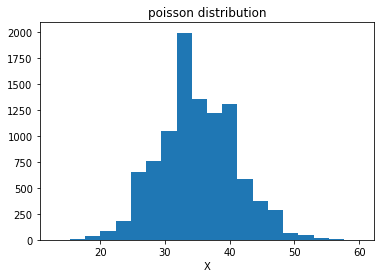

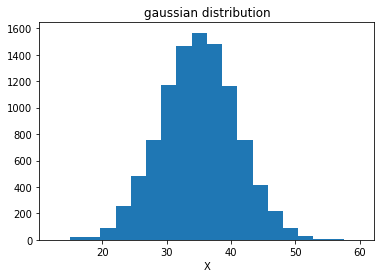

In [7]:
def five_i_and_ii():
    u = 35
    a = 35 ** 0.5
    poisson_distribution = np.random.poisson(u, 10000)
    gaussian_distribution = np.random.normal(u, a, 10000)
    plt.title("poisson distribution")
    plt.xlabel("X")
    plt.hist(poisson_distribution, 20)
    plt.show()
    plt.title("gaussian distribution")
    plt.xlabel("X")
    plt.hist(gaussian_distribution, 20)
    plt.show()

five_i_and_ii()

### (iii) Comment on the similarities and differences between the distributions.

Similarities:
the hist image they show is quite similar

differences:
possion distribution is constructed by discrete value, but the Gaussian is not. Possion is skewed, however Gaussian is uniform.

## Question 6: Bumps that go missing

(Some of this text is from a Physics World article: http://physicsworld.com/cws/article/news/2016/apr/19/theorizing-about-the-lhcs-750-gev-bump)
<bf>
Last year, the LHC's ATLAS and CMS experiments both reported a small 'bump' in their data that denoted an excess of photon pairs with a combined mass of around 750 GeV. As this unexpected bump could be the first hint of a new massive particle that is not predicted by the Standard Model of particle physics, the data generated hundreds of theory papers that attempt to explain the signal.  Taking into account what is known as the look-elsewhere effect, CMS says it has seen an excess with a statistical significance of 1.6$\sigma$, while ATLAS reports a significance of about 2$\sigma$ –- corresponding, respectively, to a roughly 1 in 10 and 1 in 20 chance that the result is a fluke.

While these levels are far below the 5$\sigma$ 'gold standard' that must be met to claim a discovery, the fact that both collaborations saw a bump at the same energy has excited theoretical physicists.}
<bf>
From the Cern Courier, October 2016:
<bf>

![title](figure_1A.JPG)

> In a dramatic parallel session, both ATLAS and CMS revealed that their 2016 data do not confirm the previous hints of a diphoton resonance at 750 GeV (figure 1); apparently, those hints were nothing more than tantalising statistical fluctuations.

### (i) Write two sentences explaining what the 'look-elsewhere effect' is.

Once a theory was raised, there might be something which cannot be explained by that. Moreover, if we can look elsewhere - like the event happening in mean plus 1.6σ, this might be a new thing we make a difference.

### (ii) There  are typically more than 100 papers a year from these detectors, each of which has up to 10 histograms, each of which has 50-100 bins.  Assuming that there are $10^5$ bins in a year, how many 2, 3, 4 and 5$\sigma$ events will there be?

In [53]:
def six_ii():
    '''Your function should return the number of 2,3,4,5 sigma events'''
    '''Assuming that 2 sigma:0.95, 3sigma:0.997, 4sigma:0.999, 5sigma: 0.999997'''
    # YOUR CODE HERE
    different_sigma_percentage = [0.95, 0.997, 0.999, 0.999997]
    bins = 10e5
    two_sigma = bins * different_sigma_percentage[0]
    three_sigma = bins * different_sigma_percentage[1]
    four_sigma = bins * different_sigma_percentage[2]
    five_sigma = bins * different_sigma_percentage[3]
    
    return(two_sigma, three_sigma, four_sigma, five_sigma)

### (iii) What are the chances of two 2$\sigma$ events at the same energy?

In [52]:
def six_iii():
    '''Your function should return the probability of two 2 sigma events at the same energy'''
    different_sigma_percentage = [0.95, 0.997, 0.999, 0.999997]
    return different_sigma_percentage[0] ** 2
    # YOUR CODE HERE

## Coding Exercise

Choose one of the distributions we discussed in the context of the Central Limit theorem: either the uniform distribution, the triangular distribution or a Gaussian distribution. They should span the interval 0 to 1.
<bf>
Write code that allows you to choose numbers at random from this distribution. Then,

<blockquote>
<bf>
(i) Choose 1,000 numbers at random, and plot a histogram of their occurrences.
</blockquote>
<bf>
<blockquote>
(ii) Choose 2 numbers from  the distribution at random, and average them.  Repeat this 1,000 times and plot a histogram.
<bf>
</blockquote>
<blockquote>
(iii) Do the same for the sum of 3, 4 and 5 numbers, and make the corresponding plots.
<bf>
</blockquote>
<blockquote>
(iv) Comment on your results.

(array([  4.,  17.,  84., 148., 233., 218., 168.,  86.,  36.,   6.]),
 array([0.11333736, 0.1885938 , 0.26385025, 0.33910669, 0.41436314,
        0.48961958, 0.56487603, 0.64013247, 0.71538892, 0.79064536,
        0.86590181]),
 <a list of 10 Patch objects>)

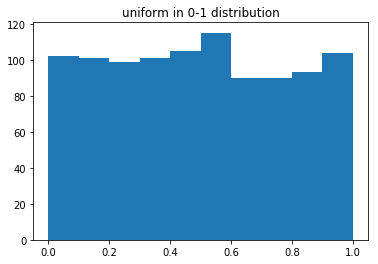

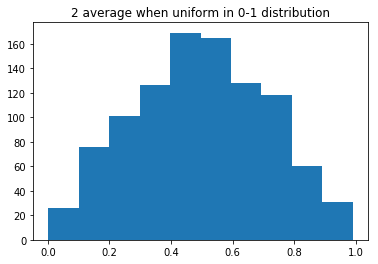

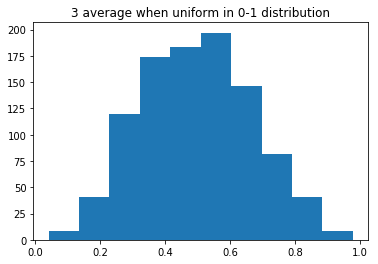

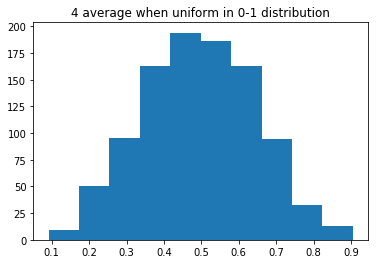

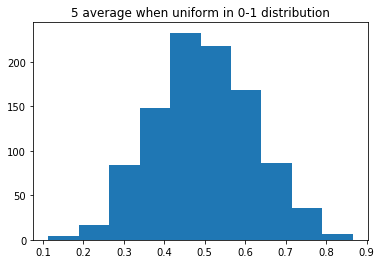

In [90]:
uniform = [np.random.random() for x in range(1000)]
plt.figure()
plt.title("uniform in 0-1 distribution")
plt.hist(uniform, 10)

uniform_average2 = []
for i in range(len(uniform)):
    indexs = [np.random.randint(0, 999) for x in range(2)]
    count = 0
    for index in indexs:
        count += uniform[index]
    count /= 2
    uniform_average2.append(count)

plt.figure()
plt.title("2 average when uniform in 0-1 distribution")
plt.hist(uniform_average2, 10)

uniform_average3 = []
for i in range(len(uniform)):
    indexs = [np.random.randint(0, 999) for x in range(3)]
    count = 0
    for index in indexs:
        count += uniform[index]
    count /= 3
    uniform_average3.append(count)

plt.figure()
plt.title("3 average when uniform in 0-1 distribution")
plt.hist(uniform_average3, 10)

uniform_average4 = []
for i in range(len(uniform)):
    indexs = [np.random.randint(0, 999) for x in range(4)]
    count = 0
    for index in indexs:
        count += uniform[index]
    count /= 4
    uniform_average4.append(count)

plt.figure()
plt.title("4 average when uniform in 0-1 distribution")
plt.hist(uniform_average4, 10)

uniform_average5 = []
for i in range(len(uniform)):
    indexs = [np.random.randint(0, 999) for x in range(5)]
    count = 0
    for index in indexs:
        count += uniform[index]
    count /= 5
    uniform_average5.append(count)

plt.figure()
plt.title("5 average when uniform in 0-1 distribution")
plt.hist(uniform_average5, 10)

### (iv) Comment on your results.

No matter which distribution I choose, the result is a Gaussian distribution with mean 0.5. Also, when there are more numbers used to calculate the average, the Gaussian looks like the Gaussian more.